# SARIMA

In [217]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [218]:
df = pd.read_csv('C:\\Users\\Darshan\\Downloads\\Misty\\revised\\name1.csv', sep=',')
df['Stime'] = pd.to_datetime(df['Stime'],format="%d-%m-%Y")

In [219]:
df.head()

,Id,Year,Month,Day,Stime,Item_number_ID,Customer_Account_ID,regionID,Quantity,Amount,SALESEXECUTIVEID,ASMID,ZONALHEADID,SALESHEADID
0,1,2018,4,1,2018-04-01,BTM0001,COBLR_0017,9,40,292.0,KTK077,NaN,KTK008,KTK002
1,2,2018,4,1,2018-04-01,BTM0001,COBLR_0036,1,200,1460.0,NaN,NaN,KTK004,KTK002
2,3,2018,4,1,2018-04-01,BTM0001,COBLR_0040,9,100,730.0,KTK081,NaN,KTK008,KTK002
3,4,2018,4,1,2018-04-01,BTM0001,COBLR_0085,1,50,365.0,KTK010,NaN,KTK004,KTK002
4,5,2018,4,1,2018-04-01,BTM0001,COBLR_0131,1,80,584.0,KTK013,NaN,KTK004,KTK002


In [220]:
df.isnull().sum()

Id                          0
Year                        0
Month                       0
Day                         0
Stime                       0
Item_number_ID              0
Customer_Account_ID         0
regionID                    0
Quantity                    0
Amount                      0
SALESEXECUTIVEID       115251
ASMID                  369529
ZONALHEADID            254897
SALESHEADID                 0
dtype: int64

In [221]:
df=df.drop(['SALESEXECUTIVEID','ASMID','ZONALHEADID','SALESHEADID'],axis=1)

In [222]:
df.isnull().sum()

Id                     0
Year                   0
Month                  0
Day                    0
Stime                  0
Item_number_ID         0
Customer_Account_ID    0
regionID               0
Quantity               0
Amount                 0
dtype: int64

In [223]:
cols = list(pd.read_csv('C:\\Users\\Darshan\\Downloads\\Misty\\revised\\product1.csv', nrows =1))
print(cols)

['productId', 'productCategory', 'productName', 'Item_number_ID', 'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit', 'HSNCode', 'shelfLife', 'purchaseRate', 'retailRate', 'maximumRate', 'minimumRate', 'GSTPercentage', 'photo', 'description', 'Createdt', 'CreateID', 'Updatedt', 'updateID', 'activeProduct']


In [224]:
prod=pd.read_csv('C:\\Users\\Darshan\\Downloads\\Misty\\revised\\product1.csv', sep=',',usecols =[i for i in cols if i != ('description')])
prod=prod.drop(['Createdt', 'CreateID','productId', 'productCategory','Updatedt','activeProduct','minimumRate','maximumRate','photo','updateID','HSNCode'], axis=1)

In [225]:
m=pd.merge(df, prod, on='Item_number_ID')

In [226]:
m.isnull().sum()

Id                     0
Year                   0
Month                  0
Day                    0
Stime                  0
Item_number_ID         0
Customer_Account_ID    0
regionID               0
Quantity               0
Amount                 0
productName            0
Product                0
Sub_Product            0
Item_name              0
weight                 0
weightUnit             0
shelfLife              0
purchaseRate           0
retailRate             0
GSTPercentage          0
dtype: int64

In [227]:
m.Product.unique()
for item in m.Product.unique():
    print (item)

BUTTER MILK
CHEESE
BUTTER
CREAM
CURD
YOGHURT
GHEE
KALAKHAND
KHOVA
LASSI
PANEER
PAYASAM
SHRIKHAND
WHEY POWDER
MISHTI DOI
MILK
GULAB JAMUN MIX


In [228]:
paneer=m.loc[(m['Product'] == 'PANEER')]


#prd=sys.argv[1]
#paneer=m.loc[(m['Product']==a)]

In [229]:
paneer.shape

(114498, 20)

In [230]:
paneer['Quantity'].min(),paneer['Quantity'].max()

(-1000, 11255)

In [231]:
paneer['Stime'].min(),paneer['Stime'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-01-31 00:00:00'))

In [232]:
paneer.shape

(114498, 20)

In [233]:
paneer.shape,paneer.columns

((114498, 20), Index(['Id', 'Year', 'Month', 'Day', 'Stime', 'Item_number_ID',
        'Customer_Account_ID', 'regionID', 'Quantity', 'Amount', 'productName',
        'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit',
        'shelfLife', 'purchaseRate', 'retailRate', 'GSTPercentage'],
       dtype='object'))

In [234]:
cols = ['Id', 'Year', 'Month', 'Day', 'Item_number_ID',
        'Customer_Account_ID', 'regionID', 'Amount', 'productName',
        'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit',
        'shelfLife', 'purchaseRate', 'retailRate', 'GSTPercentage']
paneer.drop(cols, axis=1, inplace=True)
#df = df.sort_values('Stime')

In [235]:
paneer.isnull().sum()

Stime       0
Quantity    0
dtype: int64

In [236]:
paneer.columns

Index(['Stime', 'Quantity'], dtype='object')

In [237]:
paneer.head()

,Stime,Quantity
364831,2018-04-01,650
364832,2018-04-01,24
364833,2018-04-01,200
364834,2018-04-01,20
364835,2018-04-01,60


In [238]:
paneer=paneer.resample('D', on='Stime').sum()

In [239]:
paneer.head()

,Quantity
Stime,
2018-04-01,20142
2018-04-02,28619
2018-04-03,40404
2018-04-04,36663
2018-04-05,24211


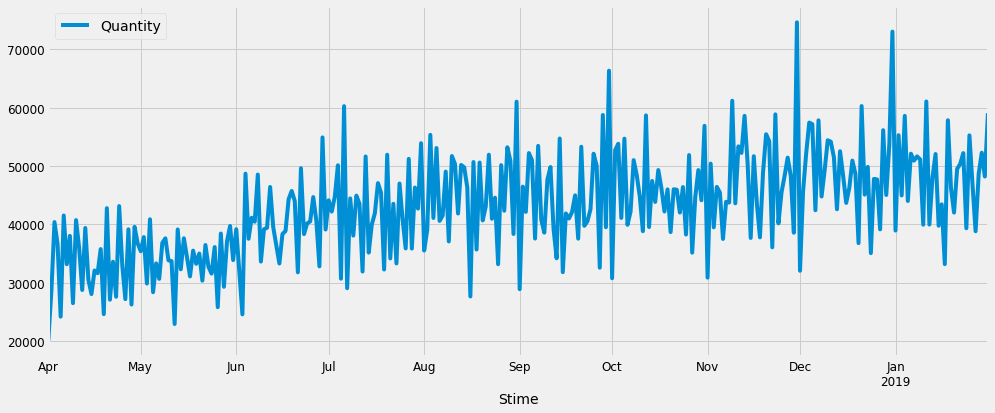

In [240]:
paneer.plot(figsize=(15, 6))
plt.show()

In [241]:
def timeseries_train_test_split(paneer, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(paneer)*(1-test_size))
    
    X_train = paneer.iloc[:test_index]
    X_test = paneer.iloc[test_index:]

    
    return X_train, X_test

In [242]:
X_train, X_test = timeseries_train_test_split(paneer, test_size=0.3)

In [243]:
X_train.tail()

,Quantity
Stime,
2018-10-27,35169
2018-10-28,44676
2018-10-29,49313
2018-10-30,44150
2018-10-31,56895


In [244]:
X_test.tail()

,Quantity
Stime,
2019-01-27,38839
2019-01-28,48669
2019-01-29,52285
2019-01-30,48212
2019-01-31,59053


In [245]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1296x576 with 0 Axes>

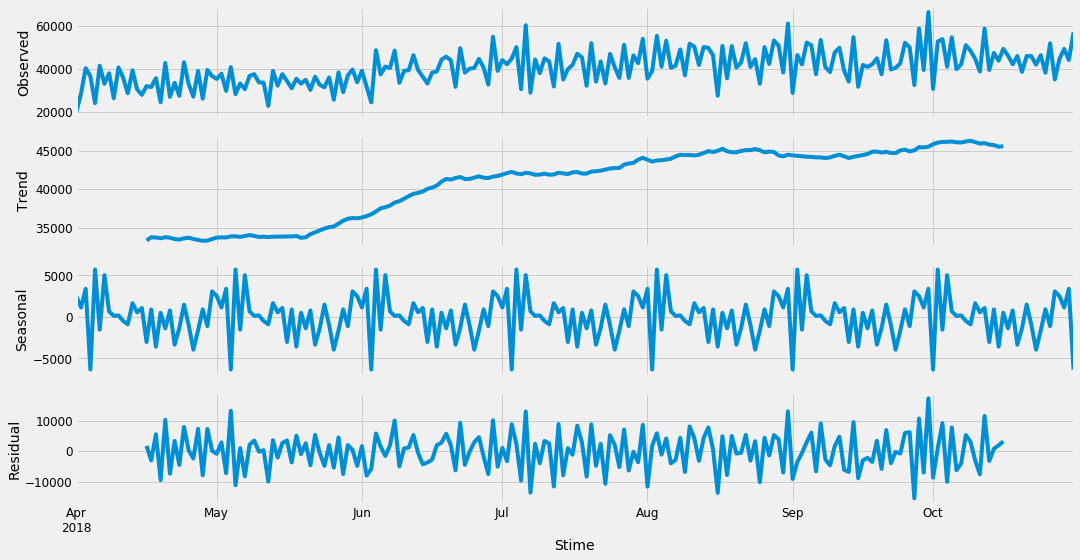

In [246]:
decomposition = seasonal_decompose(X_train.Quantity, freq=30)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

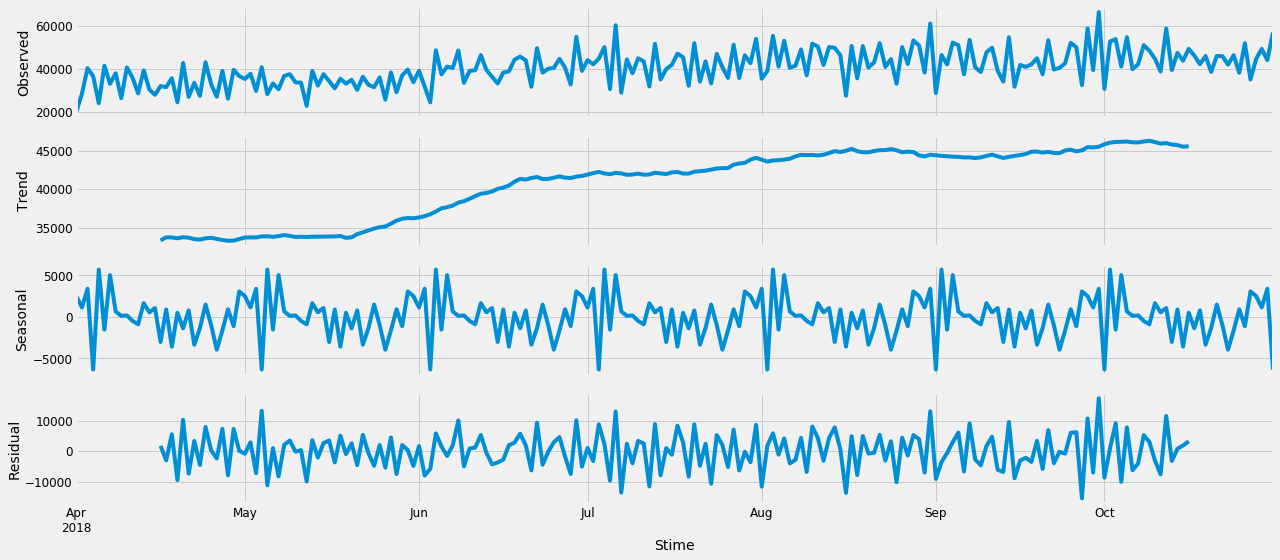

In [247]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(X_train, model='additive',freq=30)
fig = decomposition.plot()
plt.show()

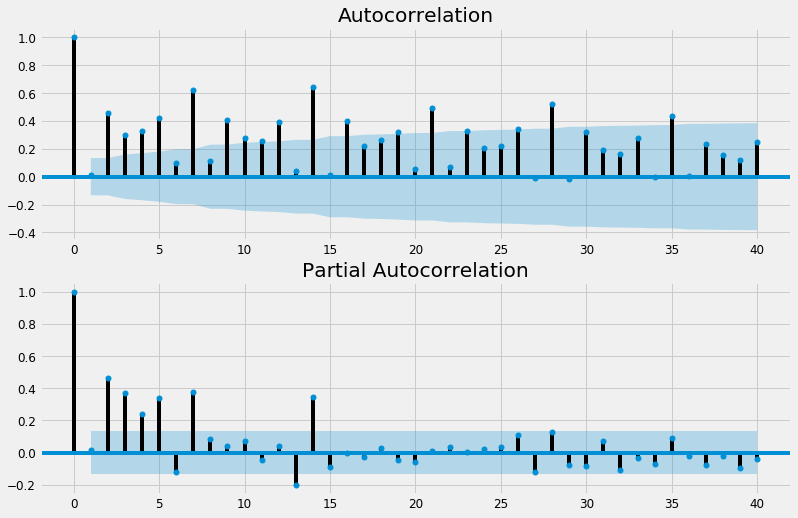

In [262]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X_train['Quantity'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X_train['Quantity'], lags=40, ax=ax2)
plt.show()

In [267]:
model=sm.tsa.ARIMA(endog=X_train['Quantity'],order=(0,1,6))
results=model.fit()
print(results.summary())

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [268]:
p = q = range(0, 8)
d=range(0,1)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X_train,
                                            order=param,
                                          
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5137.063948415878
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4729.477194726046
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:4432.322260158162
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:4149.062657723269
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:4264.6621236191595
ARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:6545.9573263787115
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4245.571096328249
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4206.012254485089
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:3946.5824882238358
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:3698.501570301016
ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:3445.346711230879
ARIMA(0, 0, 0)x(1, 0, 5, 12)12 - AIC:6188.267810308406
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:3968.509822046806
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:3968.3357516588626
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:3947.9664829462645
ARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:3691.98798550024
ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:3439.242957814572
ARIMA(0, 0, 0)x(2, 0, 5, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(3, 0

ARIMA(0, 0, 3)x(0, 0, 5, 12)12 - AIC:6125.197404017416
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:4688.774598050675
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:4596.937656904607
ARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:4320.51470890935
ARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:4044.353469291967
ARIMA(0, 0, 3)x(1, 0, 4, 12)12 - AIC:3768.2663442881912
ARIMA(0, 0, 3)x(1, 0, 5, 12)12 - AIC:5288.611776096728
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:4411.233020172568
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:4413.061136332124
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:4322.471614859851
ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:4046.3792577965387
ARIMA(0, 0, 3)x(2, 0, 4, 12)12 - AIC:3770.2523431843792
ARIMA(0, 0, 3)x(2, 0, 5, 12)12 - AIC:nan
ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:4135.175973374375
ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:4137.050818036294
ARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:4139.0487972848
ARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:4048.0975066234078
ARIMA(0, 0, 3)x(3, 0, 4, 12)12 - AIC:3772.24609521968
ARIMA(0, 0, 3)x(3, 0, 5,

ARIMA(0, 0, 6)x(1, 0, 4, 12)12 - AIC:3708.4682605544003
ARIMA(0, 0, 6)x(1, 0, 5, 12)12 - AIC:5852.228006211475
ARIMA(0, 0, 6)x(2, 0, 0, 12)12 - AIC:4421.39133014155
ARIMA(0, 0, 6)x(2, 0, 1, 12)12 - AIC:4423.195641307087
ARIMA(0, 0, 6)x(2, 0, 2, 12)12 - AIC:4262.995733948723
ARIMA(0, 0, 6)x(2, 0, 3, 12)12 - AIC:3986.628953166144
ARIMA(0, 0, 6)x(2, 0, 4, 12)12 - AIC:3710.5621903399606
ARIMA(0, 0, 6)x(2, 0, 5, 12)12 - AIC:nan
ARIMA(0, 0, 6)x(3, 0, 0, 12)12 - AIC:4145.137724050856
ARIMA(0, 0, 6)x(3, 0, 1, 12)12 - AIC:4146.898049697567
ARIMA(0, 0, 6)x(3, 0, 2, 12)12 - AIC:4148.910895232339
ARIMA(0, 0, 6)x(3, 0, 3, 12)12 - AIC:3988.6671786276147
ARIMA(0, 0, 6)x(3, 0, 4, 12)12 - AIC:3712.583743291711
ARIMA(0, 0, 6)x(3, 0, 5, 12)12 - AIC:3436.0803490181647
ARIMA(0, 0, 6)x(4, 0, 0, 12)12 - AIC:3869.0355939464625
ARIMA(0, 0, 6)x(4, 0, 1, 12)12 - AIC:3871.0142883276294
ARIMA(0, 0, 6)x(4, 0, 2, 12)12 - AIC:3872.8280443285657
ARIMA(0, 0, 6)x(4, 0, 3, 12)12 - AIC:3874.981791154443
ARIMA(0, 0, 6)x(4,

ARIMA(1, 0, 1)x(2, 0, 4, 12)12 - AIC:3379.9371299383365
ARIMA(1, 0, 1)x(2, 0, 5, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:3640.925930772315
ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:3638.5290240416907
ARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:3639.7301039435506
ARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:3621.30518377537
ARIMA(1, 0, 1)x(3, 0, 4, 12)12 - AIC:3374.6165557945797
ARIMA(1, 0, 1)x(3, 0, 5, 12)12 - AIC:3142.1260033494564
ARIMA(1, 0, 1)x(4, 0, 0, 12)12 - AIC:3399.5628891833585
ARIMA(1, 0, 1)x(4, 0, 1, 12)12 - AIC:3393.7121334464464
ARIMA(1, 0, 1)x(4, 0, 2, 12)12 - AIC:3393.565113777825
ARIMA(1, 0, 1)x(4, 0, 3, 12)12 - AIC:3392.5985008335265
ARIMA(1, 0, 1)x(4, 0, 4, 12)12 - AIC:3373.2289735360373
ARIMA(1, 0, 1)x(4, 0, 5, 12)12 - AIC:3133.7058972867844
ARIMA(1, 0, 1)x(5, 0, 0, 12)12 - AIC:3150.847037240389
ARIMA(1, 0, 1)x(5, 0, 1, 12)12 - AIC:3148.5032417086745
ARIMA(1, 0, 1)x(5, 0, 2, 12)12 - AIC:3156.786196468075
ARIMA(1, 0, 1)x(5, 0, 3, 12)12 - AIC:3145.6154525336983
ARIMA(1, 0, 1

In [260]:
mod = sm.tsa.statespace.SARIMAX(X_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5201      0.135     -3.865      0.000      -0.784      -0.256
ma.L1         -0.7954      0.102     -7.826      0.000      -0.995      -0.596
ma.S.L12      -0.8899      0.076    -11.744      0.000      -1.038      -0.741
sigma2      7.985e+07   2.39e-10   3.33e+17      0.000    7.99e+07    7.99e+07


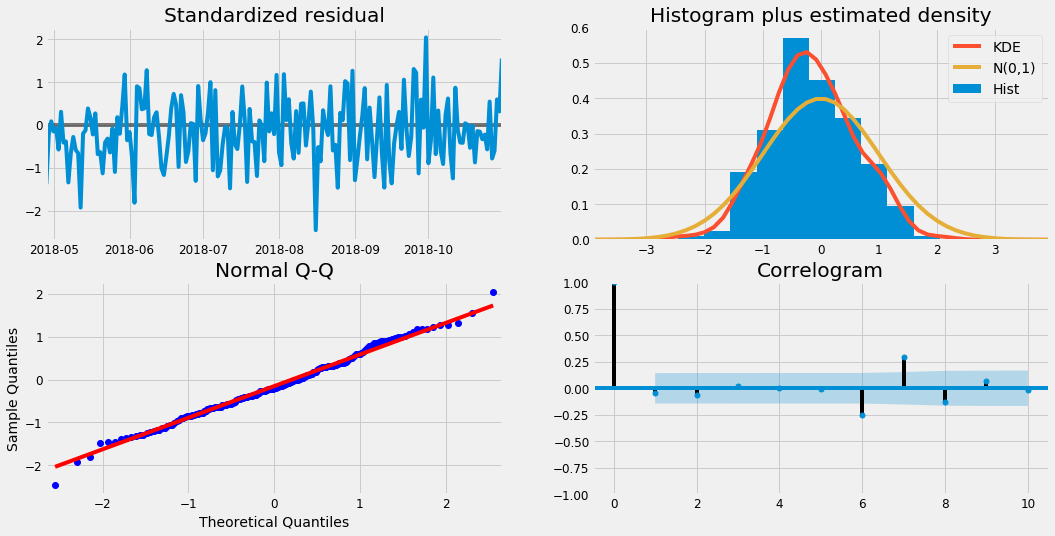

In [257]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [163]:
X_test.tail()

,Quantity
Stime,
2019-01-27,38839
2019-01-28,48669
2019-01-29,52285
2019-01-30,48212
2019-01-31,59053


In [164]:
start_index = '2018-11-01'
end_index = '2019-01-31'
forecast_test = results.predict(start=start_index, end=end_index)

In [165]:
forecast_test.head()

2018-11-01    40741.250957
2018-11-02    48281.237135
2018-11-03    48421.084776
2018-11-04    46044.516332
2018-11-05    49305.112823
Freq: D, dtype: float64

In [166]:
forecast_test=forecast_test.to_frame(name=None)

In [167]:
forecast_test.head()

,0
2018-11-01,40741.250957
2018-11-02,48281.237135
2018-11-03,48421.084776
2018-11-04,46044.516332
2018-11-05,49305.112823


In [168]:
forecast_test=forecast_test.rename(columns = {0:'Quantity_predicated'})

In [169]:
forecast_test.head()

,Quantity_predicated
2018-11-01,40741.250957
2018-11-02,48281.237135
2018-11-03,48421.084776
2018-11-04,46044.516332
2018-11-05,49305.112823


In [170]:
index = pd.date_range(start="2018-11-01", end="2019-01-31")

In [171]:
forecast_test['Stime']=index

In [172]:
forecast_test.set_index('Stime', inplace=True)

In [173]:
forecast_test.head()

,Quantity_predicated
Stime,
2018-11-01,40741.250957
2018-11-02,48281.237135
2018-11-03,48421.084776
2018-11-04,46044.516332
2018-11-05,49305.112823


Test set error

In [174]:
forecast_test_error = X_test['Quantity']-forecast_test['Quantity_predicated']

In [175]:
forecast_test_error.isnull().any()

False

In [176]:
mean_forecast_test_error = np.mean(forecast_test_error)
print(mean_forecast_test_error)

-3012.1439833935924


In [177]:
mean_absolute_test_error = np.mean( np.abs(forecast_test_error) )
print(mean_absolute_test_error)

6977.077895318261


In [178]:
mean_squared_test_error = np.mean(forecast_test_error*forecast_test_error)
print(mean_squared_test_error)

76114938.23412202


In [179]:
rmse_test = np.sqrt(mean_squared_test_error)
print(rmse_test)

8724.387556391683


In [180]:
def mean_absolute_percentage_test_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [181]:
MAPE= mean_absolute_percentage_test_error(X_test['Quantity'],forecast_test['Quantity_predicated'])
MAPE

15.557812317710603

In [182]:
X_test.shape,forecast_test.shape

((92, 1), (92, 1))

In [183]:
pjme_test=pd.merge(X_test,forecast_test, left_index=True, right_index=True)

In [184]:
MAPE= mean_absolute_percentage_test_error(pjme_test['Quantity'],pjme_test['Quantity_predicated'])
MAPE

15.557812317710603

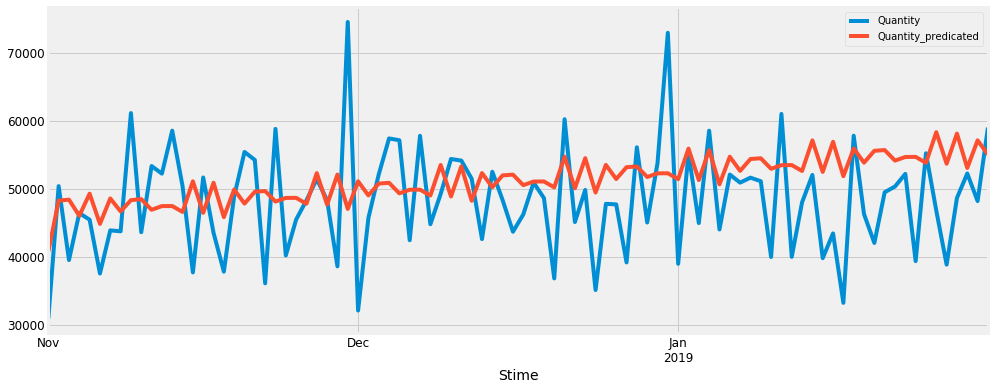

In [185]:
pjme_test.plot(figsize=(15, 6))
plt.show()

In [186]:
pjme_test.head()

,Quantity,Quantity_predicated
Stime,,
2018-11-01,30895,40741.250957
2018-11-02,50419,48281.237135
2018-11-03,39513,48421.084776
2018-11-04,46438,46044.516332
2018-11-05,45466,49305.112823


In [187]:
#pred_uc = results.get_forecast(steps=92)
#pred_ci = pred_uc.conf_int()

In [188]:
#pred_ci.tail(3)

In [189]:
#pred_uc=pred_uc.predicted_mean
#a=pred_uc.to_frame(name=None)

In [190]:
#a=a.rename(columns = {0:'Quantity_forecasted'})
#a.columns

In [191]:
#a.head()

train set error

In [192]:
start_index = '2018-04-01'
end_index = '2018-10-31'
forecast_train = results.predict(start=start_index, end=end_index)

In [193]:
forecast_train=forecast_train.to_frame(name=None)

In [194]:
forecast_train=forecast_train.rename(columns = {0:'Quantity_predicated'})

In [195]:
forecast_train.head()

,Quantity_predicated
Stime,
2018-04-01,0.000000
2018-04-02,16650.379694
2018-04-03,15019.147930
2018-04-04,15297.785531
2018-04-05,22875.693525


In [196]:
forecast_train.tail()

,Quantity_predicated
Stime,
2018-10-27,42152.036501
2018-10-28,50060.662303
2018-10-29,43964.677783
2018-10-30,41304.025934
2018-10-31,43017.651982


In [197]:
index = pd.date_range(start="2018-04-01", end="2018-10-31")
forecast_train['Stime']=index
forecast_train.set_index('Stime', inplace=True)

In [198]:
forecast_train.head()

,Quantity_predicated
Stime,
2018-04-01,0.000000
2018-04-02,16650.379694
2018-04-03,15019.147930
2018-04-04,15297.785531
2018-04-05,22875.693525


In [199]:
X_train.head()

,Quantity
Stime,
2018-04-01,20142
2018-04-02,28619
2018-04-03,40404
2018-04-04,36663
2018-04-05,24211


In [200]:
forecast_train_error = X_train['Quantity']-forecast_train['Quantity_predicated']

In [201]:
mean_forecast_train_error = np.mean(forecast_train_error)
print(mean_forecast_train_error)

-1263.6261527274658


In [202]:
mean_absolute_train_error = np.mean( np.abs(forecast_train_error) )
print(mean_absolute_train_error)

6048.7451402551515


In [203]:
mean_squared_train_error = np.mean(forecast_train_error*forecast_train_error)
print(mean_squared_test_error)

76114938.23412202


In [204]:
rmse_train = np.sqrt(mean_squared_train_error)
print(rmse_test)

8724.387556391683


In [205]:
def mean_absolute_percentage_train_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [206]:
MAPE= mean_absolute_percentage_train_error(X_train['Quantity'],forecast_train['Quantity_predicated'])
MAPE

16.35342061796694

In [207]:
pjme_train=pd.merge(X_train,forecast_train, left_index=True, right_index=True)

In [208]:
MAPE= mean_absolute_percentage_train_error(pjme_train['Quantity'],pjme_train['Quantity_predicated'])
MAPE

16.35342061796694

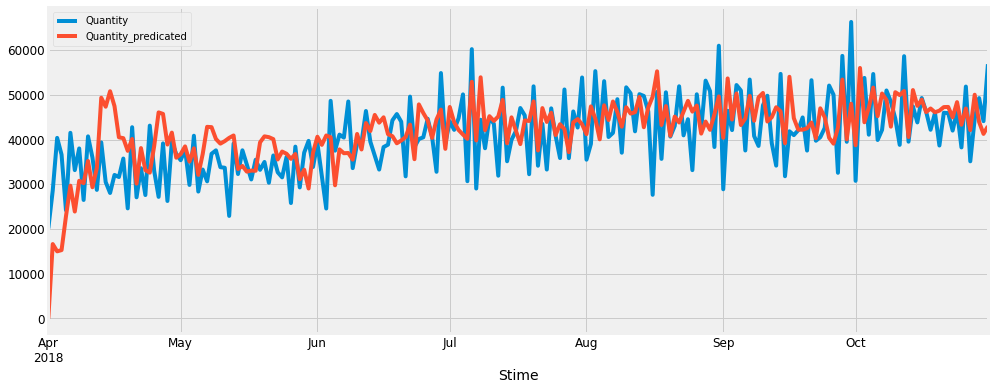

In [209]:
pjme_train.plot(figsize=(15, 6))
plt.show()

In [210]:
all = pd.concat([pjme_train,pjme_test], sort=False)

In [211]:
all.head()

,Quantity,Quantity_predicated
Stime,,
2018-04-01,20142,0.000000
2018-04-02,28619,16650.379694
2018-04-03,40404,15019.147930
2018-04-04,36663,15297.785531
2018-04-05,24211,22875.693525


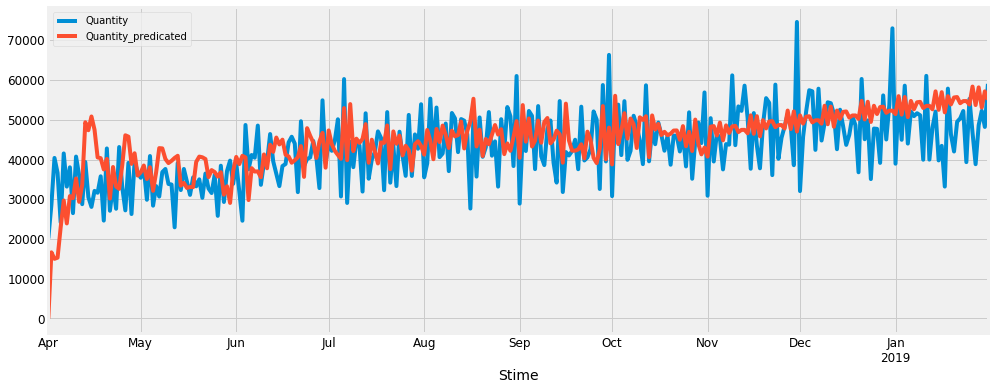

In [212]:
all.plot(figsize=(15, 6))
plt.show()

In [566]:
import pickle
# save model to file
pickle.dump(results, open("paneer-model_SARIMA.pkl", "wb"))

In [567]:
SARIMA_model_pkl = open("C:\\Users\\Darshan\\Desktop\\Data science python - edx\\Week-4-Pandas\\Week-4-Pandas\\paneer-model_SARIMA.pkl", 'rb')
#pickle_model = pickle.load(SARIMA_model_pkl)
#print ("Loaded SARIMA model :: ", pickle_model)

In [213]:
start_index = '2019-01-28'
end_index = '2019-02-23'
Forecast = pickle_model.predict(start=start_index, end=start_index)

NameError: name 'pickle_model' is not defined

In [214]:
with open('arima.pkl', 'wb') as pkl:
    pickle.dump(arima, pkl)

# You can still make predictions from the model at this point
arima.predict(n_periods=5)

# Now read it back and make a prediction
with open('arima.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl).predict(n_periods=5)

NameError: name 'pickle' is not defined

In [150]:
start_index = '2019-01-28'
end_index = '2019-02-23'
forecast = results.predict(start=start_index, end=end_index)

In [151]:
forecast=forecast.to_frame(name=None)
forecast=forecast.rename(columns = {0:'Quantity_predicated'})
forecast.head()

,Quantity_predicated
2019-01-28,46732.269368
2019-01-29,46732.269368
2019-01-30,46732.269368
2019-01-31,46732.269368
2019-02-01,46732.269368


In [152]:
index = pd.date_range(start="2019-01-28", end="2019-02-23")
forecast['Stime']=index
forecast.set_index('Stime', inplace=True)

In [153]:
forecast.head()

,Quantity_predicated
Stime,
2019-01-28,46732.269368
2019-01-29,46732.269368
2019-01-30,46732.269368
2019-01-31,46732.269368
2019-02-01,46732.269368


In [154]:
all_l = pd.concat([pjme_train,pjme_test,forecast], sort=False)

In [155]:
all_l.tail()

,Quantity,Quantity_predicated
Stime,,
2019-02-19,NaN,46732.269368
2019-02-20,NaN,46732.269368
2019-02-21,NaN,46732.269368
2019-02-22,NaN,46732.269368
2019-02-23,NaN,46732.269368


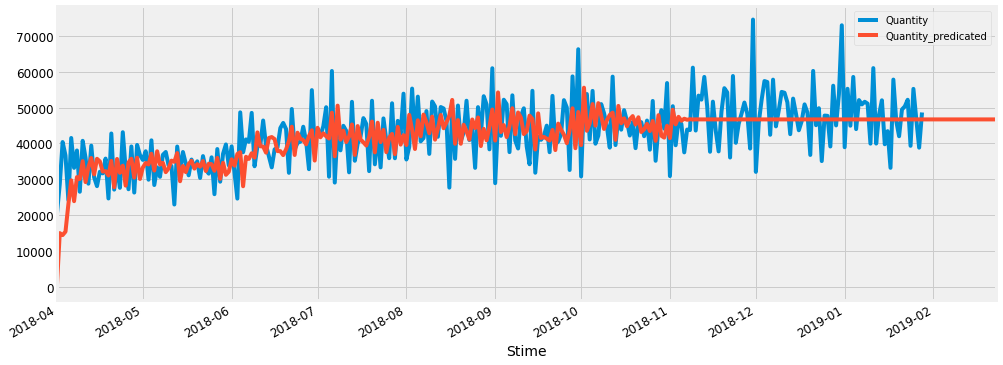

In [156]:
all_l.plot(figsize=(15, 6))
plt.show()